In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

100%|██████████| 780k/780k [00:00<00:00, 76.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


link dataset : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('/root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1/kc_house_data.csv')
# Cek data awal
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Penjelasan Dataset: King County House Sales (kc_house_data) Dataset ini berisi data penjualan rumah di King County, USA (wilayah Seattle).

- id: Kode unik untuk setiap rumah (tidak dipakai untuk prediksi).
- date: Tanggal rumah terjual.
- price: Harga jual rumah (Target variabel yang mau kita prediksi).
- bedrooms: Jumlah kamar tidur.
- bathrooms: Jumlah kamar mandi (0.5 berarti ada toilet tapi gak ada shower).
- sqft_living: Luas area dalam rumah (satuan kaki persegi).
- sqft_lot: Luas tanah (satuan kaki persegi).
- floors: Jumlah lantai (tingkat).
- waterfront: Apakah rumah punya pemandangan laut/danau? (0 = Tidak, 1 = Ya).
- view: Seberapa bagus pemandangannya (skala 0-4).
- condition: Kondisi fisik rumah secara keseluruhan (skala 1-5).
- grade: Kualitas konstruksi dan desain bangunan (skala 1-13, dimana 13 terbaik).
- sqft_above: Luas area rumah di atas tanah (tidak termasuk basement).
- sqft_basement: Luas area basement.
- yr_built: Tahun rumah dibangun.
- yr_renovated: Tahun rumah direnovasi (0 jika belum pernah).
- zipcode: Kode pos.
- lat: Garis Lintang (Latitude).
- long: Garis Bujur (Longitude).
- sqft_living15: Rata-rata luas rumah tetangga terdekat (15 rumah).
- sqft_lot15: Rata-rata luas tanah tetangga terdekat (15 rumah).

In [ ]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,house_age,is_renovated
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,43.317818,0.042289
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,-1.000000,0.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,18.000000,0.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,40.000000,0.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,63.000000,0.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,115.000000,1.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,29.375493,0.201253


In [ ]:
print("Data Shape:", df.shape)
baris = df.shape[0]
kolom = df.shape[1]

print("baris :", baris)
print("kolom :", kolom)

Data Shape: (21613, 21)
baris : 21613
kolom : 21


# Data Cleaning

In [ ]:
# Hapus kolom yang tidak berguna untuk prediksi
df_clean = df.drop(['id', 'date'], axis=1)

# Cek apakah ada data yang kosong (Missing Values)
print("Jumlah data kosong per kolom:")
print(df_clean.isnull().sum())

# (Opsional) Jika ada data kosong, kita buang barisnya
df_clean = df_clean.dropna()

print("\nUkuran data setelah cleaning:", df_clean.shape)

Jumlah data kosong per kolom:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Ukuran data setelah cleaning: (21613, 19)


# Visualisasi Data

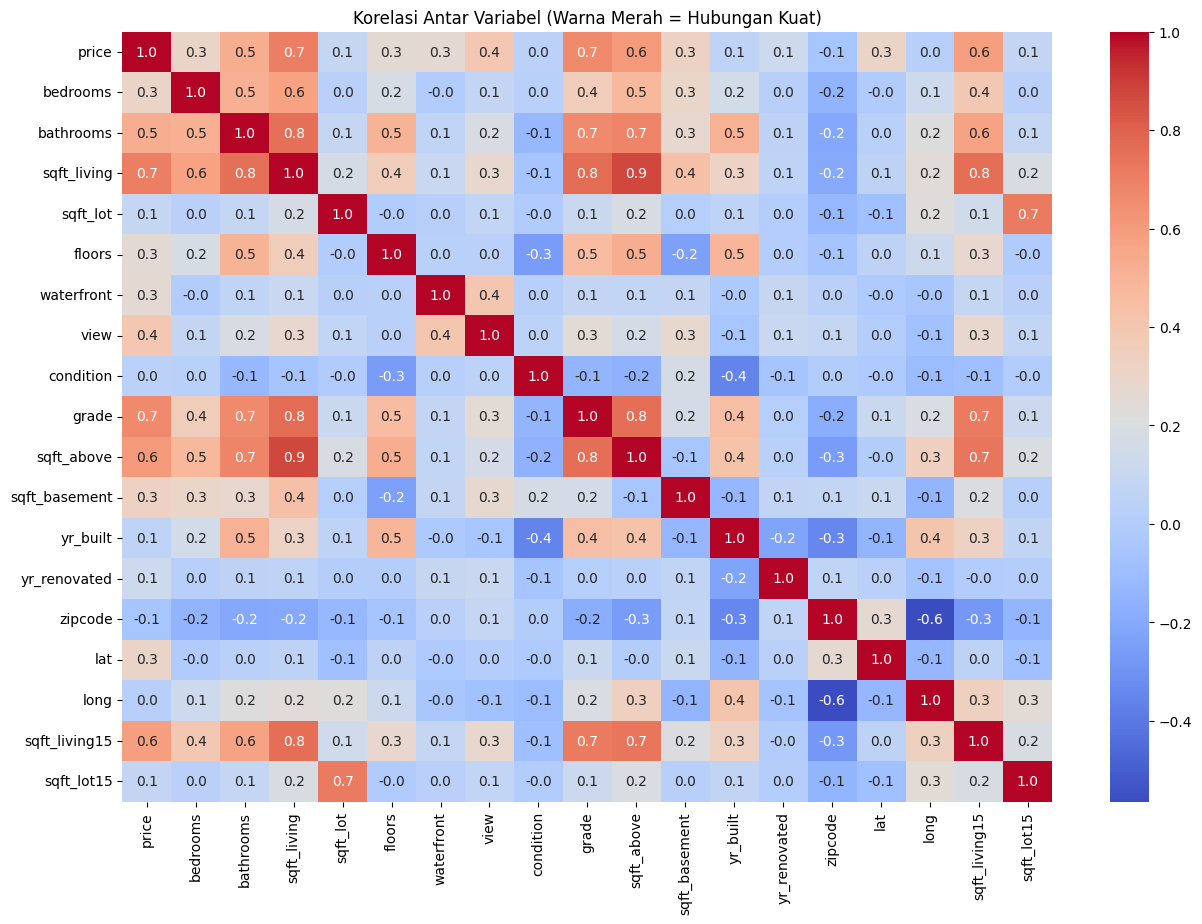

In [ ]:
# Kita gunakan Heatmap untuk melihat hubungan antar variabel
plt.figure(figsize=(15, 10))

# Menghitung korelasi
correlation = df_clean.corr()

# Menggambar heatmap
sns.heatmap(correlation, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Korelasi Antar Variabel (Warna Merah = Hubungan Kuat)')
plt.show()

# Penjelasan: Perhatikan baris 'price'.
# Kotak yang warnanya paling merah/gelap (misal: sqft_living, grade)
# adalah fitur yang paling menentukan harga rumah.

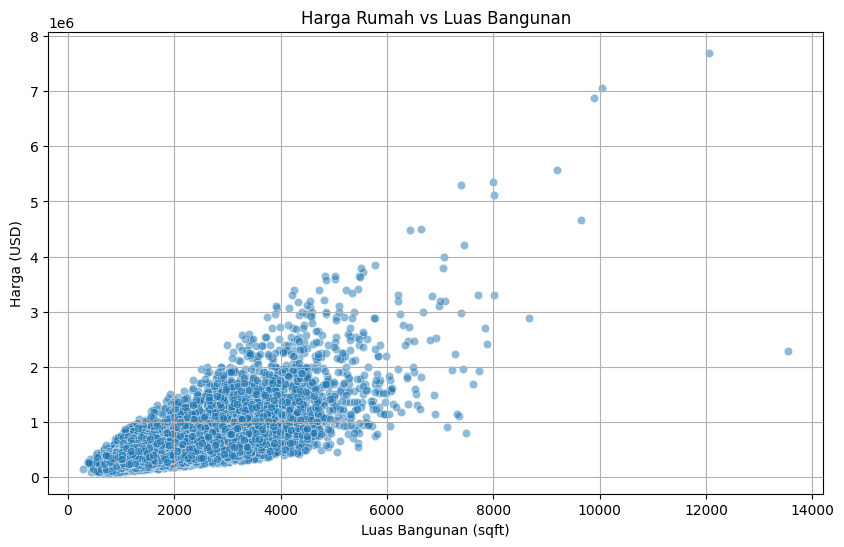

In [ ]:
# Mari kita lihat hubungan Luas Rumah (sqft_living) dengan Harga (price)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df_clean, alpha=0.5)
plt.title('Harga Rumah vs Luas Bangunan')
plt.xlabel('Luas Bangunan (sqft)')
plt.ylabel('Harga (USD)')
plt.grid(True)
plt.show()

# Data preparation

In [ ]:
from sklearn.model_selection import train_test_split

# Tentukan Fitur (X) dan Target (y)
# X adalah semua kolom KECUALI harga
X = df_clean.drop('price', axis=1)
# y adalah kolom harga saja
y = df_clean['price']

# Bagi data: 80% untuk Latihan (Train), 20% untuk Ujian (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latihan: {X_train.shape[0]} baris")
print(f"Jumlah data ujian: {X_test.shape[0]} baris")

Jumlah data latihan: 17290 baris
Jumlah data ujian: 4323 baris


# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

# 1. Panggil modelnya (Linear Regression)
model = LinearRegression()

# 2. Latih modelnya dengan data latihan (X_train dan y_train)
print("Sedang melatih model...")
model.fit(X_train, y_train)
print("Model selesai dilatih!")

Sedang melatih model...
Model selesai dilatih!


# Evaluasi

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Minta model memprediksi harga menggunakan data ujian (X_test)
y_pred = model.predict(X_test)

# Hitung akurasinya
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Hasil Evaluasi Model ---")
print(f"R-Squared (Akurasi): {r2:.2f}")
# R-Squared mendekati 1 artinya sangat bagus, mendekati 0 artinya jelek.
print(f"RMSE (Rata-rata Kesalahan): {rmse:.2f}")
# RMSE adalah rata-rata selisih harga tebakan model dengan harga asli.

--- Hasil Evaluasi Model ---
R-Squared (Akurasi): 0.70
RMSE (Rata-rata Kesalahan): 212539.52


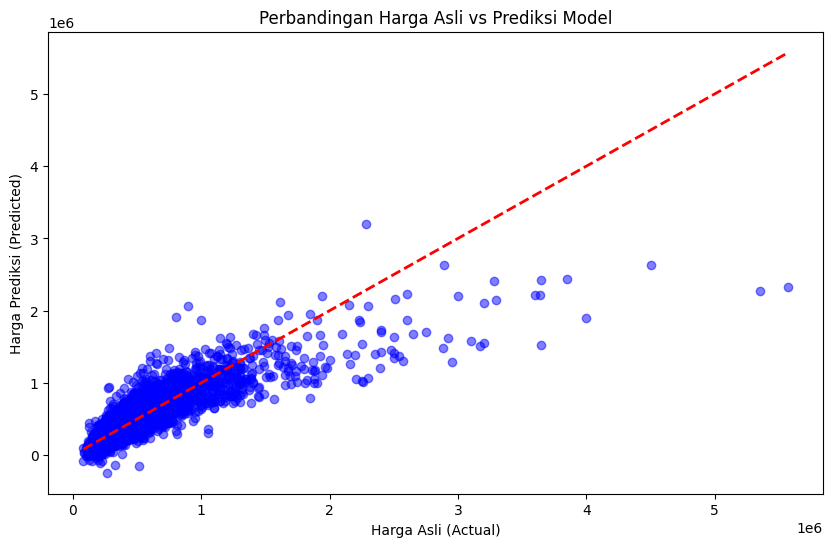

In [ ]:
# Mari kita bandingkan harga asli vs tebakan model dalam grafik
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

# Garis merah adalah garis sempurna (jika tebakan 100% tepat)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Harga Asli (Actual)')
plt.ylabel('Harga Prediksi (Predicted)')
plt.title('Perbandingan Harga Asli vs Prediksi Model')
plt.show()

# Test

In [ ]:
# Misalkan kita punya data rumah baru dengan spesifikasi tertentu
# Kita ambil contoh satu baris dari data test untuk simulasi
rumah_baru = X_test.iloc[[0]]

print("Spesifikasi Rumah Baru:")
rumah_baru

Spesifikasi Rumah Baru:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700


In [ ]:
# Prediksi harganya
harga_prediksi = model.predict(rumah_baru)

print(f"\nPrediksi Harga Rumah: USD {harga_prediksi[0]:,.2f}")
print(f"Harga Aslinya: USD {y_test.iloc[0]:,.2f}")

selisih = abs((harga_prediksi[0]).astype(int) - (y_test.iloc[0]).astype(int))
print(f"Selisih : USD {selisih:,.2f}")


Prediksi Harga Rumah: USD 461,209.95
Harga Aslinya: USD 365,000.00
Selisih : USD 96,209.00


# Feature Engineering


In [ ]:
# Kita load ulang datanya biar fresh
df_feature = df

# --- 1. MEMBEDAH TANGGAL (Date Parsing) ---
# Ubah format tanggal biar dimengerti komputer
df_feature['date'] = pd.to_datetime(df_feature['date'])
# Kita pecah jadi Tahun dan Bulan (karena harga bisa beda tiap musim)
df_feature['year_sold'] = df_feature['date'].dt.year
df_feature['month_sold'] = df_feature['date'].dt.month

# --- 2. MENGHITUNG UMUR RUMAH (House Age) ---
# Daripada cuma tau 'tahun dibangun', lebih masuk akal kalau komputer tau 'umur rumahnya'
df_feature['house_age'] = df_feature['year_sold'] - df_feature['yr_built']

# --- 3. MENYEDERHANAKAN RENOVASI ---
# Data tahun renovasi itu banyak yang 0 (belum pernah renov).
# Kita ubah jadi: 1 (Pernah Renov) atau 0 (Belum Pernah). Lebih simpel.
df_feature['is_renovated'] = df_feature['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# --- 4. DATA CLEANING AKHIR ---
# Kita buang kolom yang udah gak kepake atau udah digantiin fitur baru
# 'id': tidak berguna
# 'date': udah diganti year_sold & month_sold
# 'yr_built': udah diganti house_age
# 'yr_renovated': udah diganti is_renovated
features_drop = ['id', 'date', 'yr_built', 'yr_renovated']
df_final = df.drop(features_drop, axis=1)

print("Data siap dimodelkan!")
df_final.head()

Data siap dimodelkan!


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,house_age,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,10,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,98125,47.7210,-122.319,1690,7639,2014,12,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,2,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,98136,47.5208,-122.393,1360,5000,2014,12,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,2,28,0


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan Soal (X) dan Kunci Jawaban (y)
X = df_final.drop('price', axis=1)
y = df_final['price']

# Bagi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Size: {X_train.shape}")
print(f"Testing Size: {X_test.shape}")

Training Size: (17290, 20)
Testing Size: (4323, 20)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Kita pake 100 pohon keputusan (n_estimators=100) biar akurat
# random_state=42 biar hasilnya konsisten tiap kali di-run
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
print("Selesai! Model sudah pintar.")

Selesai! Model sudah pintar.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Hitung Skor
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("--- HASIL AKHIR ---")
print(f"Akurasi Model (R^2): {r2_rf:.2f}") # Harusnya lompat ke 0.85-an
print(f"Error Rata-rata (RMSE): {rmse_rf:,.0f}")

--- HASIL AKHIR ---
Akurasi Model (R^2): 0.85
Error Rata-rata (RMSE): 150,601


/tmp/ipython-input-810043135.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


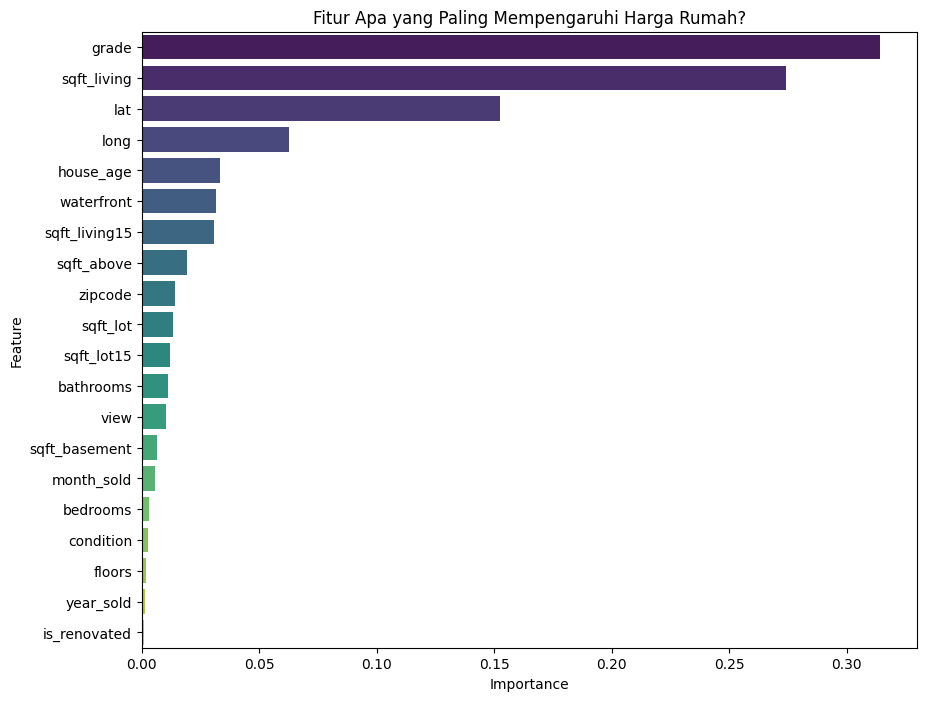

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil data tingkat kepentingan fitur
importance = rf_model.feature_importances_
feature_names = X.columns

# Bikin DataFrame buat plotting
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('Fitur Apa yang Paling Mempengaruhi Harga Rumah?')
plt.show()

# Penjelasan Dataset: King County House Sales (kc_house_data) Dataset ini berisi data penjualan rumah di King County, USA (wilayah Seattle).

- id: Kode unik untuk setiap rumah (tidak dipakai untuk prediksi).
- date: Tanggal rumah terjual.
- price: Harga jual rumah (Target variabel yang mau kita prediksi).
- bedrooms: Jumlah kamar tidur.
- bathrooms: Jumlah kamar mandi (0.5 berarti ada toilet tapi gak ada shower).
- sqft_living: Luas area dalam rumah (satuan kaki persegi).
- sqft_lot: Luas tanah (satuan kaki persegi).
- floors: Jumlah lantai (tingkat).
- waterfront: Apakah rumah punya pemandangan laut/danau? (0 = Tidak, 1 = Ya).
- view: Seberapa bagus pemandangannya (skala 0-4).
- condition: Kondisi fisik rumah secara keseluruhan (skala 1-5).
- grade: Kualitas konstruksi dan desain bangunan (skala 1-13, dimana 13 terbaik).
- sqft_above: Luas area rumah di atas tanah (tidak termasuk basement).
- sqft_basement: Luas area basement.
- yr_built: Tahun rumah dibangun.
- yr_renovated: Tahun rumah direnovasi (0 jika belum pernah).
- zipcode: Kode pos.
- lat: Garis Lintang (Latitude).
- long: Garis Bujur (Longitude).
- sqft_living15: Rata-rata luas rumah tetangga terdekat (15 rumah).
- sqft_lot15: Rata-rata luas tanah tetangga terdekat (15 rumah).